<a href="https://colab.research.google.com/github/sumitttp/Machine_learning_labs/blob/main/lab2_linearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LINEAR REGRESSION (SINGLE VARIABLE)

# Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load and Inspect Data

In [ ]:
df = pd.read_csv('/content/Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


# plotting the data

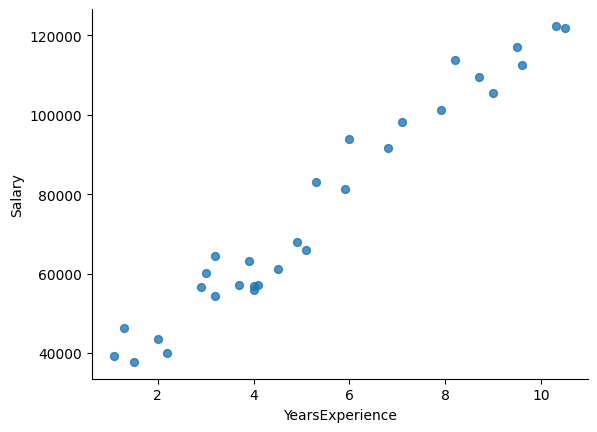

In [ ]:
df.plot(kind='scatter', x='YearsExperience', y='Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# data characteristics

In [ ]:
print(df.head())

   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes
None


In [ ]:
print(df.describe())

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


# Data handling

In [ ]:
print(df.isnull().sum())

YearsExperience    0
Salary             0
dtype: int64


# Select Features and Target

In [ ]:
X = df[['YearsExperience']]  # Features (must be in 2D array format)
y = df['Salary']  # Target variable

# Splitting the data into test and train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression Model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 49830096.85590839
R-squared (R²): 0.9024461774180497


In [ ]:
print(f'Intercept: {model.intercept_}')
print(f'Coefficient for Experience: {model.coef_[0]}')

Intercept: 25321.583011776813
Coefficient for Experience: 9423.815323030976


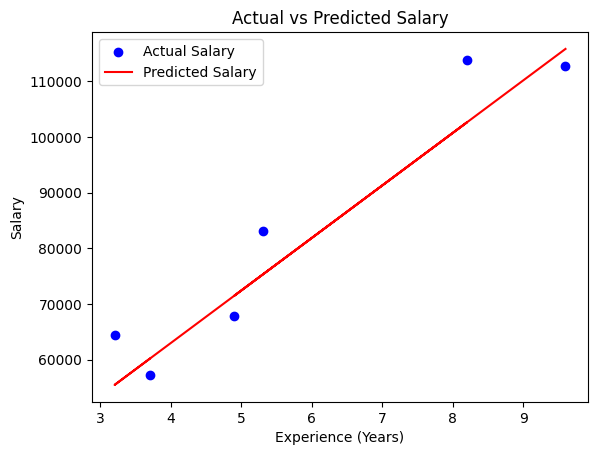

In [ ]:
plt.scatter(X_test, y_test, color='blue', label='Actual Salary')
plt.plot(X_test, y_pred, color='red', label='Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [ ]:
new_experience = pd.DataFrame({
    'YearsExperience': [3, 5, 7]  # Changed column name to 'YearsExperience'
})
new_salary_predictions = model.predict(new_experience)
for exp, salary in zip(new_experience['YearsExperience'], new_salary_predictions):
    print(f'Predicted salary for {exp} years of experience: {salary}')

Predicted salary for 3 years of experience: 53593.02898086974
Predicted salary for 5 years of experience: 72440.6596269317
Predicted salary for 7 years of experience: 91288.29027299365


In [ ]:
model.predict([[3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53593.02898087])

# **MULTI VARIABLE LINEAR REGRESSION MODEL**


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load and Inspect Data

In [ ]:
df = pd.read_csv('/content/insurance.csv')
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


# Data handling

Handle Missing Values

In [ ]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64


In [ ]:
print(df.head())

   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [ ]:
print(df.describe())

               age          bmi     children      expenses
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.665471     1.094918  13270.422414
std      14.049960     6.098382     1.205493  12110.011240
min      18.000000    16.000000     0.000000   1121.870000
25%      27.000000    26.300000     0.000000   4740.287500
50%      39.000000    30.400000     1.000000   9382.030000
75%      51.000000    34.700000     2.000000  16639.915000
max      64.000000    53.100000     5.000000  63770.430000


In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
print(df.head())

   age   bmi  children  expenses  sex_male  smoker_yes  region_northwest  \
0   19  27.9         0  16884.92     False        True             False   
1   18  33.8         1   1725.55      True       False             False   
2   28  33.0         3   4449.46      True       False             False   
3   33  22.7         0  21984.47      True       False              True   
4   32  28.9         0   3866.86      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


# Select Features and Target

In [ ]:
X = df.drop('expenses', axis=1)  # All features except 'expenses'
y = df['expenses']  # Target variable

# split data into train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression Model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 33600065.355077825
R-squared (R²): 0.7835726930039906


In [ ]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                   Coefficient
age                 256.955959
bmi                 337.271473
children            425.641376
sex_male            -18.519741
smoker_yes        23650.312302
region_northwest   -370.313511
region_southeast   -658.712382
region_southwest   -809.229878


In [ ]:
model.intercept_

-11936.774427292194

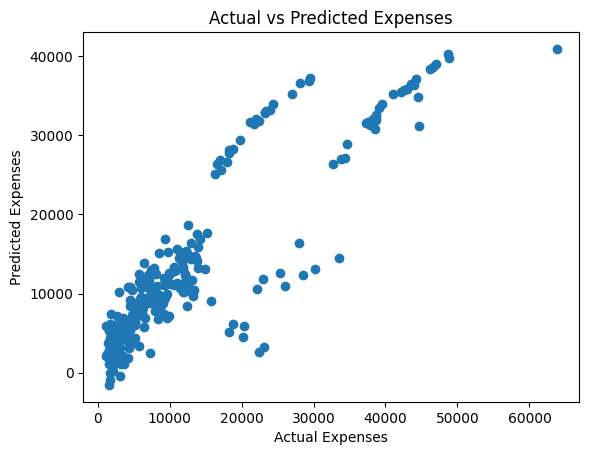

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Expenses')
plt.ylabel('Predicted Expenses')
plt.title('Actual vs Predicted Expenses')
plt.show()

# Making the predictions

In [ ]:

new_data = pd.DataFrame({
    'age': [35],
    'bmi': [30.5],
    'children': [2],
    'sex_male': [1],  # 1 for male, 0 for female (as it's encoded)
    'smoker_yes': [1],  # 1 for smoker, 0 for non-smoker
    'region_northwest': [1],
    'region_southeast': [0],
    'region_southwest': [0]
})

new_pred = model.predict(new_data)

print(f'Predicted expenses for new data: {new_pred[0]}')


Predicted expenses for new data: 31456.225873439995


OR we can directly put up the values in the form of arrays according to the order of columns

In [ ]:
model.predict([[35, 30.5, 2,1,1,1,0,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([31456.22587344])